In [2]:
import pandas as pd
import sys
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv("C:/Users/minji/Downloads/201803-hubway-tripdata/201803_hubway_tripdata.csv")

## EDA

In [5]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1464,2018-03-01 00:00:38,2018-03-01 00:25:03,75,Lafayette Square at Mass Ave / Main St / Colum...,42.363465,-71.100573,130,Upham's Corner TEMPORARY WINTER LOCATION,42.317509,-71.064166,1028,Customer,NaN,0
1,298,2018-03-01 00:00:42,2018-03-01 00:05:41,226,Commonwealth Ave At Babcock St,42.351547,-71.121262,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,1060,Subscriber,1996.0,1
2,1414,2018-03-01 00:01:20,2018-03-01 00:24:54,75,Lafayette Square at Mass Ave / Main St / Colum...,42.363465,-71.100573,130,Upham's Corner TEMPORARY WINTER LOCATION,42.317509,-71.064166,583,Subscriber,1991.0,1
3,1192,2018-03-01 00:03:19,2018-03-01 00:23:12,21,Prudential Center - Belvedere St,42.346520,-71.080658,27,Roxbury Crossing T Stop - Columbus Ave at Trem...,42.331184,-71.095171,1724,Subscriber,1998.0,1
4,128,2018-03-01 00:04:05,2018-03-01 00:06:13,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,19,Park Dr at Buswell St,42.347241,-71.105301,1538,Subscriber,1994.0,1


In [6]:
data.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

### Data cleaning

#### Convert tripduration to minutes, drop station longitudes&latitudes

In [7]:
data['tripduration'] = data['tripduration'].apply(lambda x: datetime.timedelta(seconds = x))

In [8]:
data = data.drop({'start station latitude','start station longitude','end station latitude','end station longitude'}, axis = 1)

In [9]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender
0,00:24:24,2018-03-01 00:00:38,2018-03-01 00:25:03,75,Lafayette Square at Mass Ave / Main St / Colum...,130,Upham's Corner TEMPORARY WINTER LOCATION,1028,Customer,NaN,0
1,00:04:58,2018-03-01 00:00:42,2018-03-01 00:05:41,226,Commonwealth Ave At Babcock St,10,B.U. Central - 725 Comm. Ave.,1060,Subscriber,1996.0,1
2,00:23:34,2018-03-01 00:01:20,2018-03-01 00:24:54,75,Lafayette Square at Mass Ave / Main St / Colum...,130,Upham's Corner TEMPORARY WINTER LOCATION,583,Subscriber,1991.0,1
3,00:19:52,2018-03-01 00:03:19,2018-03-01 00:23:12,21,Prudential Center - Belvedere St,27,Roxbury Crossing T Stop - Columbus Ave at Trem...,1724,Subscriber,1998.0,1
4,00:02:08,2018-03-01 00:04:05,2018-03-01 00:06:13,10,B.U. Central - 725 Comm. Ave.,19,Park Dr at Buswell St,1538,Subscriber,1994.0,1


### Group by start station

In [13]:
group_start = data.groupby(['start station id','end station id']).last()

In [14]:
group_start

tripduration            starttime  \
start station id end station id                                     
1                1                  00:30:56  2018-03-12 18:12:32   
                 22                 00:26:47  2018-03-20 17:08:04   
                 49                 00:33:19  2018-03-29 10:40:09   
                 58                 00:21:02  2018-03-30 17:56:24   
                 71                 02:31:08  2018-03-29 13:55:14   
...                                      ...                  ...   
228              189                00:02:03  2018-03-27 12:38:17   
                 190                00:05:48  2018-03-30 16:18:35   
                 225                00:08:59  2018-03-29 21:30:32   
                 228                00:04:41  2018-03-09 12:27:37   
232              27                 00:15:23  2018-03-01 09:28:42   

                                            stoptime  \
start station id end station id                        
1                1               2018-03-12 18:43:28   
                 22              2018-03-20 17:34:52   
                 49              2018-03-29 11:13:29   
                 58              2018-03-30 18:17:27   
                 71              2018-03-29 16:26:22   
...                                              ...   
228              189             2018-03-27 12:40:20   
                 190             2018-03-30 16:24:24   
                 225             2018-03-29 21:39:32   
                 228             2018-03-09 12:32:18   
232              27              2018-03-01 09:44:06   

                                               start station name  \
start station id end station id                                     
1                1                          18 Dorrance Warehouse   
                 22                         18 Dorrance Warehouse   
                 49                         18 Dorrance Warehouse   
                 58                         18 Dorrance Warehouse   
                 71                         18 Dorrance Warehouse   
...                                                           ...   
228              189                           One Memorial Drive   
                 190                           One Memorial Drive   
                 225                           One Memorial Drive   
                 228                           One Memorial Drive   
232              27              Four Corners - 157 Washington St   

                                                                  end station name  \
start station id end station id                                                      
1                1                                           18 Dorrance Warehouse   
                 22                               South Station - 700 Atlantic Ave   
                 49                                        Stuart St at Charles St   
                 58                                      Beacon St at Arlington St   
                 71                                Conway Park - Somerville Avenue   
...                                                                            ...   
228              189                                                     Kendall T   
                 190                             Nashua Street at Red Auerbach Way   
                 225             Cambridge Dept. of Public Works -147 Hampshire...   
                 228                                            One Memorial Drive   
232              27              Roxbury Crossing T Stop - Columbus Ave at Trem...   

                                 bikeid    usertype  birth year  gender  
start station id end station id                                          
1                1                 1835  Subscriber      1960.0       1  
                 22                 721  Subscriber      1987.0       1  
                 49                 615  Subscriber      1987.0       1  
                 5

In [32]:
# mean(endtime - starttime)
# Which stations are most used for start/end of the journey

### Use of stations

[0 1 2 3 4]


### Gender

In [30]:
data_gender = data.groupby('gender')

In [75]:
data_gender.count()

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year
gender,,,,,,,,,,
0,4858,4858,4858,4858,4858,4858,4858,4858,4858,302
1,44814,44814,44814,44814,44814,44814,44814,44814,44814,44814
2,13313,13313,13313,13313,13313,13313,13313,13313,13313,13313


ValueError: setting an array element with a sequence.

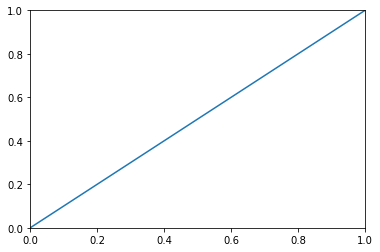

In [77]:
plt.plot(data_gender)

In [78]:
data_gender.agg(max)

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year
gender,,,,,,,,,,
0,7 days 17:17:50,2018-03-31 23:12:07,2018-04-03 12:53:40,228,Wentworth Institute of Technology - Huntington...,228,Wentworth Institute of Technology - Huntington...,2004,Subscriber,1998.0
1,4 days 22:37:31,2018-03-31 23:57:27,2018-04-01 10:20:21,232,Wentworth Institute of Technology - Huntington...,228,Wentworth Institute of Technology - Huntington...,2004,Subscriber,2001.0
2,1 days 13:54:10,2018-03-31 23:58:30,2018-04-01 10:35:44,228,Wentworth Institute of Technology - Huntington...,228,Wentworth Institute of Technology - Huntington...,2004,Subscriber,2001.0


In [79]:
data_gender.agg(min)

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year
gender,,,,,,,,,,
0,00:01:09,2018-03-01 00:00:38,2018-03-01 00:25:03,3,175 N Harvard St,1,175 N Harvard St,1,Customer,1888.0
1,00:01:01,2018-03-01 00:00:42,2018-03-01 00:05:41,1,175 N Harvard St,1,175 N Harvard St,1,Subscriber,1900.0
2,00:01:02,2018-03-01 00:18:41,2018-03-01 00:31:05,3,175 N Harvard St,1,175 N Harvard St,1,Subscriber,1942.0


### by birth year

In [55]:
print(data['birth year'].max())
print(data['birth year'].min())

2001.0
1888.0


    Birth year is not so much reliable

### By usertype

In [102]:
## Check if there's different usertype than Customer and Subscriber
data[(data.usertype !='Customer') & (data.usertype!='Subscriber')]

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender


In [ ]:
# plt.bar(data['usertype'], height=len(data))

KeyboardInterrupt: 

## Basic Report
* 15 columns => 11 after dropped longitutdes and latitudes, 62985 rows
* Gender 0: 4858, 1: 44814, 2: 13313
* 4442 customers, 58543 subscribers
* Birthyear may be incorrect

## Possible questions to answer: 
* Can we prevent a bike station from overflowing?
    - how many bikes can be parked in one station?
    - analyze which bike station is most popular and decide whether they should bring more bikes or take out some of bikes and replenish at another station

## Clarification needed
* gender 0, 1,2

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender
0,00:24:24,2018-03-01 00:00:38,2018-03-01 00:25:03,75,Lafayette Square at Mass Ave / Main St / Colum...,130,Upham's Corner TEMPORARY WINTER LOCATION,1028,Customer,NaN,0
8,00:36:53,2018-03-01 00:06:29,2018-03-01 00:43:23,6,Cambridge St at Joy St,58,Beacon St at Arlington St,1078,Customer,NaN,0
9,00:35:50,2018-03-01 00:07:07,2018-03-01 00:42:58,6,Cambridge St at Joy St,58,Beacon St at Arlington St,1923,Customer,NaN,0
10,01:15:53,2018-03-01 00:10:24,2018-03-01 01:26:17,6,Cambridge St at Joy St,42,Boylston St at Arlington St TEMPORARY WINTER L...,1836,Customer,NaN,0
13,00:32:15,2018-03-01 00:10:42,2018-03-01 00:42:57,6,Cambridge St at Joy St,58,Beacon St at Arlington St,1965,Customer,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
62944,00:07:04,2018-03-31 22:50:15,2018-03-31 22:57:20,116,359 Broadway - Broadway at Fayette Street,68,Central Square at Mass Ave / Essex St,689,Customer,NaN,0
62947,00:12:54,2018-03-31 22:53:35,2018-03-31 23:06:30,140,Danehy Park,142,Alewife Station at Russell Field,880,Customer,NaN,0
62953,00:04:50,2018-03-31 23:05:08,2018-03-31 23:09:59,68,Central Square at Mass Ave / Essex St,116,359 Broadway - Broadway at Fayette Street,561,Customer,NaN,0
62954,00:04:19,2018-03-31 23:05:34,2018-03-31 23:09:54,68,Central Square at Mass Ave / Essex St,116,359 Broadway - Broadway at Fayette Street,689,Customer,NaN,0
